## Giới thiệu về thuật toán Kmeans Clustering

Kmeans là thuật toán học không giám sát (Vì dữ liệu không có label) cụ thể đây là thuật toán phân cụm. Thuật toán phân dữ liệu thành các group dựa vào bản chất của dữ liệu, sao cho dữ liệu trong mỗi group có điểm tương đồng dựa theo một tiêu chí nào đó.

## Import thư viện

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Đọc và plot dữ liệu

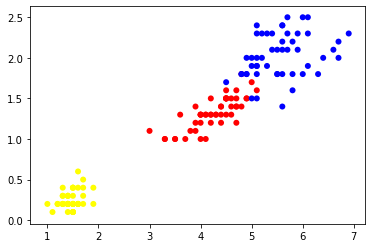

In [3]:
df = pd.read_csv("data.csv")

def plot(df):
    species_versicolor = df[df['Species']=='Iris-versicolor']
    species_virginica = df[df['Species']=='Iris-virginica']
    species_setosa = df[df['Species']=='Iris-setosa']
    
    plt.scatter(x=species_versicolor['PetalLengthCm'], y=species_versicolor['PetalWidthCm'], color='red', edgecolor='none')
    plt.scatter(x=species_virginica['PetalLengthCm'], y=species_virginica['PetalWidthCm'], color='blue', edgecolor='none')
    plt.scatter(x=species_setosa['PetalLengthCm'], y=species_setosa['PetalWidthCm'], color='yellow', edgecolor='none')

plot(df)
X = df.iloc[:, 0:2].values
# y = df['Species'].values

## Thuật toán Kmeans - Tự implement

### Thuật toán

1. Chọn K
2. Random center
3. Lăp nếu nhỏ hơn số lần lặp chỉ định trước hoặc |old_center-new_center| < epsilon <br />
	b1. Phân mỗi điểm dữ liệu vào cụm có center gần nó nhất <br />
	b2 Cập nhật center bằng cách lấy trung bình tất cả dữ liệu trong cụm đó

#### 1. Chọn K

In [12]:
K = 3

#### 2. Random center

In [45]:
def create_centers(X):
    indicates = np.random.randint(0, len(X), size=K)
    initial_centers = X[indicates]
    return initial_centers

centers = create_centers(X)
centers = {i: value for i, value in enumerate(centers)}
centers

{0: array([1.5, 0.1]), 1: array([4.8, 1.8]), 2: array([1.4, 0.2])}

#### 3. Lăp nếu nhỏ hơn số lần lặp chỉ định trước hoặc |old_center-new_center| < epsilon

In [33]:
import copy

def fit(X, max_iter, epsilon, centers):
    count = 0
    while count < max_iter:
        features = {cluster: [] for cluster in range(K)}
        for x in X:
            distances = [np.linalg.norm(x - centers[center]) for center in centers]
            nearest = np.argmin(distances)
            features[nearest].append(x)
            
        old_centers = copy.deepcopy(centers)
        is_optimal = False
        for center in centers:
            centers[center] = np.mean(features[center], axis=0)
            if np.abs(centers[center] - old_centers[center]).all() < epsilon:
                is_optimal = True
    
        if is_optimal:
            break 
        count+=1
    return centers

centers = fit(X, max_iter=100, epsilon=1e-4, centers=centers)
centers

{0: array([1.464, 0.244]),
 1: array([5.62608696, 2.04782609]),
 2: array([4.29259259, 1.35925926])}

#### Plot kết quả

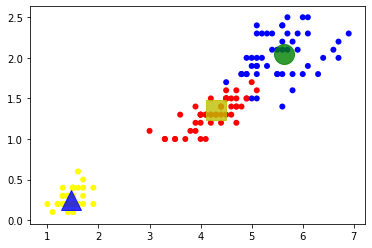

In [29]:
def plot_result(centers, df):
    plot(df)
    plt.plot(centers[0][0], centers[0][1], 'b^', markersize = 20, alpha = .8)
    plt.plot(centers[1][0], centers[1][1], 'go', markersize = 20, alpha = .8)
    plt.plot(centers[2][0], centers[2][1], 'ys', markersize = 20, alpha = .8)
plot_result(centers, df)

## Sử dụng thư viện

In [5]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=K, init='k-means++')
cluster.fit(X)

NameError: name 'K' is not defined

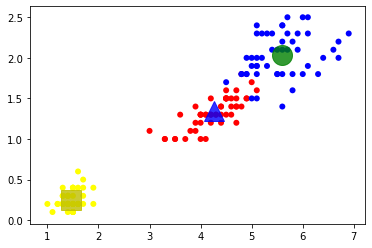

In [41]:
plot_result(cluster.cluster_centers_, df)

## Evaluation

silhouette_score là phương pháp đo độ tương đồng của các điểm dữ liệu trong một cluster <br />
Giá trị này nằm trong khoảng từ -1 đến 1. Tốt nhất là 1. Tệ nhất là -1. Các giá trị càng gần 0 nghĩa là các cluster đang bị đè lên nhau

In [43]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, cluster.labels_)
print("Score=", score)

Score= 0.6602760882193361


## Choose reasonable K

K là 1 hyperparameter được xác định trước quá trình training. Dữ liệu thông thường ta không thể biết được giá trị optimal K. Sử dụng elbow để tìm ra giá trị K thích hợp <br/>
Việc lựa chọn giá trị của K sao cho K không quá lớn và giá trị của distortions phải đủ nhỏ. Có sự đánh đổi giữa giá trị của K và distortions. Vì khi K lớn thì K = n_samples khi đó distortions có giá trị nhỏ tiến dần đến 0

550.6434666666667
86.40394533571003
31.38775897435898
19.49940089968511
13.933308757908758
11.041545110250373
9.343542857142857
7.726251190476192
6.496659206692712


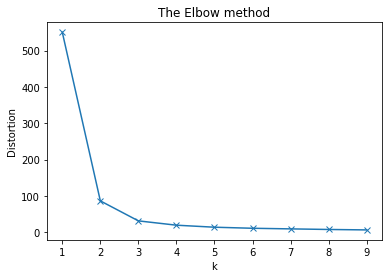

In [6]:
def elbow(X, fixed_k):
    distortions = []
    for k in fixed_k:
        cluster = KMeans(n_clusters=k)
        cluster.fit(X)
        distortions.append(cluster.inertia_)
        print(cluster.inertia_)

    plt.plot(fixed_k, distortions, 'x-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow method')

elbow(X, range(1, 10))

## Kmeans++

Chiến thuật để khởi tạo giá trị của các center ban đầu để tránh trường hợp bị mắc kẹt ở vị trí local minimum

<img src="kmeans++.png" width="400px">

1. Chọn random một điểm bất kỳ làm center <br/>
<img src="kmeans_1++.png" width="400px">

2. Tính khoảng cách từ điểm đó đến tất cả các điểm còn lại
<img src="kmeans_2++.png" width="400px">

3. Chọn điểm có khoảng cách xa nhất làm center thứ 2
<img src="kmeans_3++.png" width="400px">

4. Tính khoảng cách các điểm đến center gần nó nhất
<img src="kmeans_4++.png" width="400px">

5. Center mới thu được chính là điểm dữ liệu có khoảng cách dài nhất khi so sánh khoảng cách dài nhất ứng với mỗi center đã tính ở bước trên 
<img src="kmeans_5++.png" width="400px">

6. Lặp cho đến khi số lượng centers bằng K
<img src="kmeans_6++.png" width="400px">